In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## User Purchase 

In [110]:
#loading the data 
user_purchase = pd.read_csv("user_purchase_data.csv")
user_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_uid                1000 non-null   int64 
 1   date_joined             1000 non-null   object
 2   date_of_first_purhcase  576 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [69]:
#convert date variable in to date format and finding the diiference between purchase date and join date
user_purchase["purchase_Date"] = pd.to_datetime(user_purchase["date_of_first_purhcase"])
user_purchase["join_Date"] = pd.to_datetime(user_purchase["date_joined"])
user_purchase=user_purchase.drop(['date_of_first_purhcase','date_joined'],axis=1)
user_purchase["Diffrenece"]=user_purchase["purchase_Date"].sub(user_purchase["join_Date"], axis=0)
user_purchase.head()

,user_uid,purchase_Date,join_Date,Diffrenece
0,6,2021-06-04,2021-06-04,0 days
1,608,NaT,2021-06-04,NaT
2,635,NaT,2021-06-04,NaT
3,745,NaT,2021-06-04,NaT
4,1506,NaT,2021-06-04,NaT


In [70]:
#flagged for purchased with in a week
user_purchase['Paid with in a week'] = user_purchase['Diffrenece']<='7 days'
user_purchase.head()

,user_uid,purchase_Date,join_Date,Diffrenece,Paid with in a week
0,6,2021-06-04,2021-06-04,0 days,True
1,608,NaT,2021-06-04,NaT,False
2,635,NaT,2021-06-04,NaT,False
3,745,NaT,2021-06-04,NaT,False
4,1506,NaT,2021-06-04,NaT,False


Text(0.5, 1.0, 'No of users weekly purchased the course')

<Figure size 1296x360 with 0 Axes>

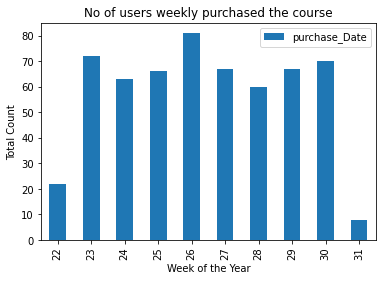

In [94]:
#user_purchase["purchase_Date"] = user_purchase["purchase_Date"].astype("datetime64")
#bar = user_purchase.groupby(user_purchase["purchase_Date"].user_purchase.month).count().plot(kind="bar")
plt.figure(figsize=(18,5))
user_purchase["purchase_Date"] = user_purchase["purchase_Date"].astype("datetime64")
user_purchase_date = user_purchase[['purchase_Date']]
user_purchase_date.groupby(user_purchase_date["purchase_Date"].dt.isocalendar().week).count().plot(kind="bar")
# x-axis label
plt.xlabel('Week of the Year')
# frequency label
plt.ylabel('Total Count')
# plot title
plt.title('No of users weekly purchased the course')


In [16]:
freq = user_purchase['Paid with in a week'].value_counts()
freq.head()

False    510
True     490
Name: Paid with in a week, dtype: int64

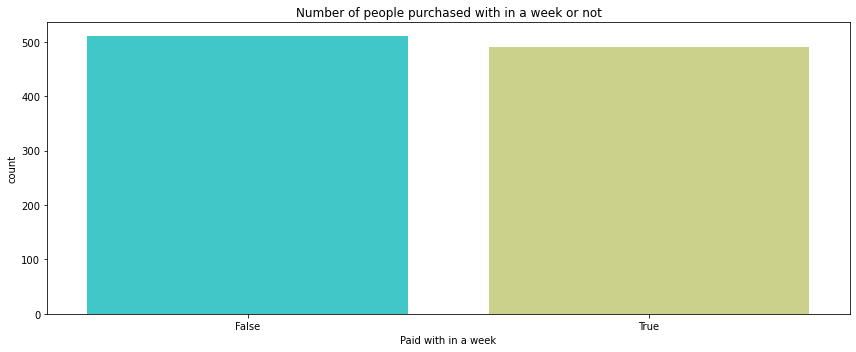

In [109]:
plt.figure(figsize=(12,5))
sns.countplot(data=user_purchase,x='Paid with in a week',palette='rainbow')
plt.title("Number of people purchased with in a week or not")
plt.tight_layout()
plt.savefig("countplot")

#### (Here concluded that  490 users are paid  within a week)

## User Video Activity

In [112]:
video_activity = pd.read_csv("user_video_activity_data.csv")
video_activity['watch_perc'] = (video_activity['watched_duration']/video_activity['duration'])*100 
video_activity.head()
video_activity.describe()

,user_id,watch_instance_id,video_id,duration,watched_duration,watch_perc
count,12907.000000,1.290700e+04,12907.000000,12907.000000,12907.000000,1.289700e+04
mean,147604.903308,2.597046e+07,25052.587046,1301.076548,481.282018,inf
std,110460.036213,9.159953e+05,15226.162079,942.394084,681.515109,NaN
min,6.000000,2.399647e+07,13.000000,0.000000,-3.000000,-3.393665e-01
25%,55112.000000,2.526961e+07,6857.000000,666.000000,8.000000,6.772009e-01
50%,129707.000000,2.598465e+07,28736.000000,983.000000,162.000000,2.264054e+01
75%,228010.000000,2.677103e+07,39458.000000,1740.000000,732.000000,1.000000e+02
max,404290.000000,2.746554e+07,48576.000000,8514.000000,6197.000000,inf


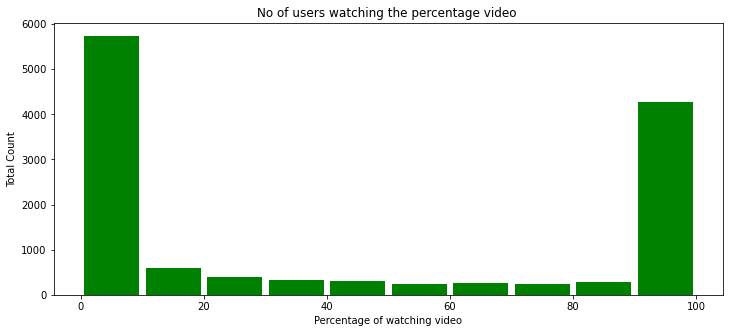

In [113]:
plt.figure(figsize=(12,5))
range = (0, 100)
bins = 10 

# plotting a histogram
plt.hist(video_activity['watch_perc'], bins, range, color = 'green',
        histtype = 'bar', rwidth = 0.9 )
 
# x-axis label
plt.xlabel('Percentage of watching video')
# frequency label
plt.ylabel('Total Count')
# plot title
plt.title('No of users watching the percentage video ')
 
# function to show the plot
plt.show()

#### (Most of the people are watching (0-10)% percentage of video. second most the people are watching (90-100)%of video) 

## Track Subscription

In [46]:
track_subscription = pd.read_csv("track_subscription_data.csv")
track_subscription.head()

,user_id,track_slug,subscription_date
0,6,kerala-psc,2021-06-04
1,6,KTET,2021-06-04
2,608,spoken-english,2021-06-04
3,608,APPSC,2021-06-04
4,608,Eng_With_Awal,2021-06-04


In [74]:
#Top 10 Courses subscribed by users
freq = track_subscription['track_slug'].value_counts().sort_values(ascending=False)
freq.head(10)


Spoken_eng_hindi    284
spoken-english      213
kerala-psc          163
BANK-INS             64
ssc                  57
Eng_Inver_Coc        56
TNPSC                56
rrb                  53
Apti_ess             44
Anb_eng              43
Name: track_slug, dtype: int64

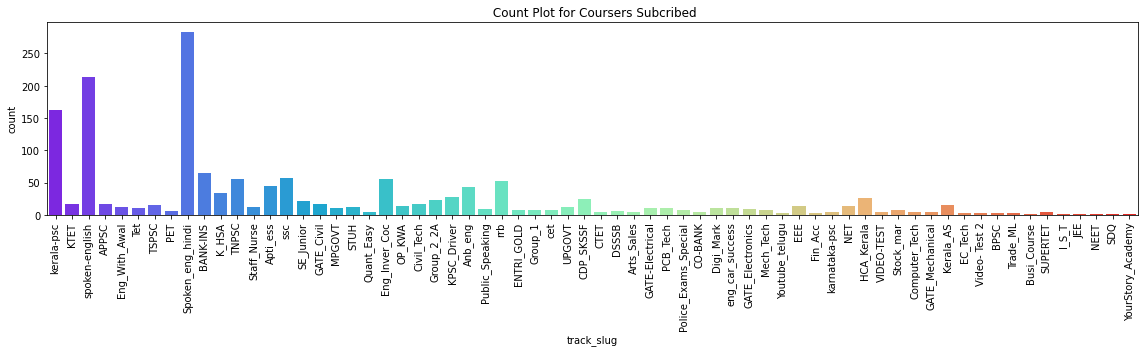

In [79]:
plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
sns.countplot(data=track_subscription,x='track_slug',palette='rainbow')
plt.title(" Count Plot for Coursers Subcribed")
plt.tight_layout()
plt.savefig("countplot")

#### (Most of people  purchased coursers are Spoken_eng_hindi, spoken-english, kerala-psc ) 

## Quiz Attempt 

In [34]:
user_quiz_attempt_data = pd.read_csv("user_quiz_attempt_data.csv")
user_quiz_attempt_data.head()

,user_id,attempt_id,started_at,status,no_of_questions,question_attempted
0,1506,50839743,None,CREATE,10,0
1,1506,50839752,None,PAUSE,10,10
2,1642,50842794,2021-06-04 16:52:25.634573+00:00,COMPLETE,10,10
3,1642,50843057,2021-06-04 16:55:37.917805+00:00,COMPLETE,10,10
4,1642,50843164,None,CREATE,10,0


In [46]:
#status= ['PAUSE','COMPLETE','PROGRESS','CREATE']
user_quiz_attempt_data['attempt_perc'] = (user_quiz_attempt_data['question_attempted']/user_quiz_attempt_data['no_of_questions'])*100
user_quiz_attempt_pause = user_quiz_attempt_data[user_quiz_attempt_data.status.isin(['PAUSE'])]
user_quiz_attempt_complete = user_quiz_attempt_data[user_quiz_attempt_data.status.isin(['COMPLETE'])]
user_quiz_attempt_progress = user_quiz_attempt_data[user_quiz_attempt_data.status.isin(['PROGRESS'])]
user_quiz_attempt_create = user_quiz_attempt_data[user_quiz_attempt_data.status.isin(['CREATE'])]


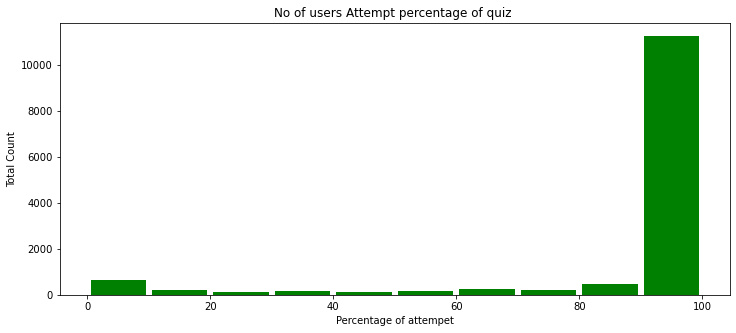

In [97]:
plt.figure(figsize=(12,5))
range = (0, 100)
bins = 10 

# plotting a histogram
plt.hist(user_quiz_attempt_complete['attempt_perc'], bins, range, color = 'green',
        histtype = 'bar', rwidth = 0.9 )
 
# x-axis label
plt.xlabel('Percentage of attempet')
# frequency label
plt.ylabel('Total Count')
# plot title
plt.title('No of users Attempt percentage of quiz ')
 
# function to show the plot
plt.show()

###### (Most of the people (90-100)% of quiz Completed)


In [96]:
import session_info
session_info.show()